# Portuges Bank 


### Problem Statement:

### Dataset

### Attribute Information:

###### Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


##### In this project I will demonstrate how to build a model predicting clients subscribing to a bank's term deposit in Python using the following steps:

-Collecting and Reading data

-Data preprocessing

-Exploratory Data Analysis

-Building training and test samples

-Model selection

-Model evaluation

### Collecting and Reading data

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load the CSV file
df = pd.read_csv('bank-additional-full.csv')
print ('Number of samples: ',len(df))

Number of samples:  41188


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

### Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Statistical Analysis
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Checking Missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#Checking for duplicates
df.duplicated().sum()

12

In [9]:
#Investigating these 12 duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


These relate to different campaigns hence not duplicates

# Exploratory Data Analysis

### Age Distribution

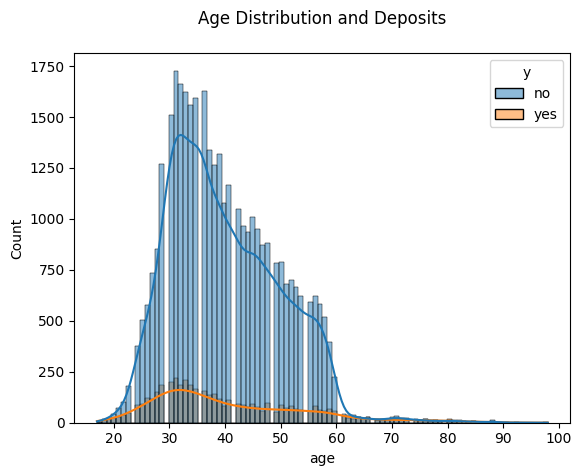

In [10]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

### Distribution of Occupation

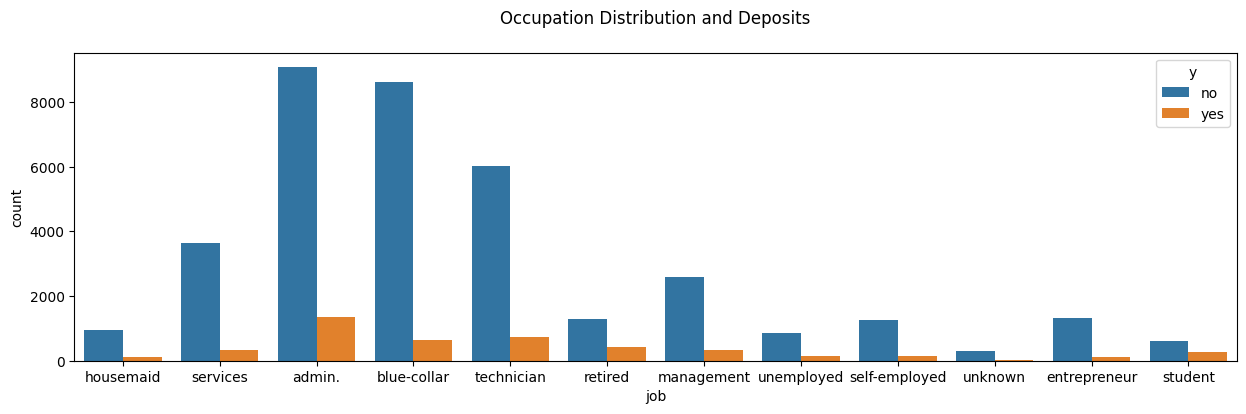

In [11]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

### Distribution of Marital Status

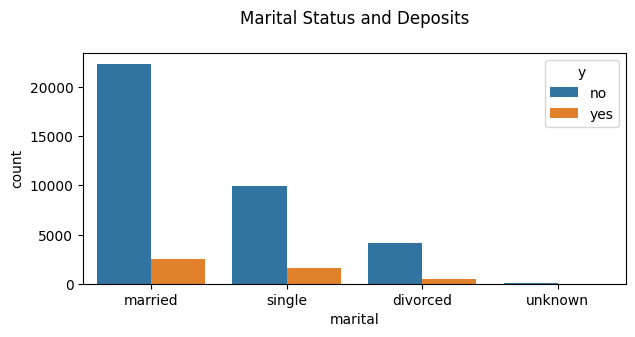

In [12]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

+ Clients are mostly married
+ If client is Single than high chance that client subscribe a term deposit
+ If client is divorced than very low chance that client subscribe a term deposit 

### Distribution of Education Status

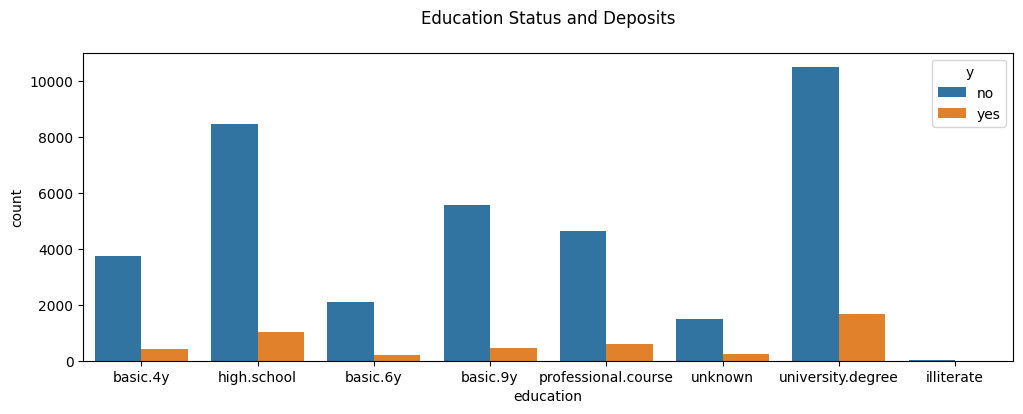

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= df, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

+ Most of the clients have University degree and have studied high or professional course.
+ Most of the clients who subscribed term deposte have University degree and have studied high.

### Distribution of Personal Loan

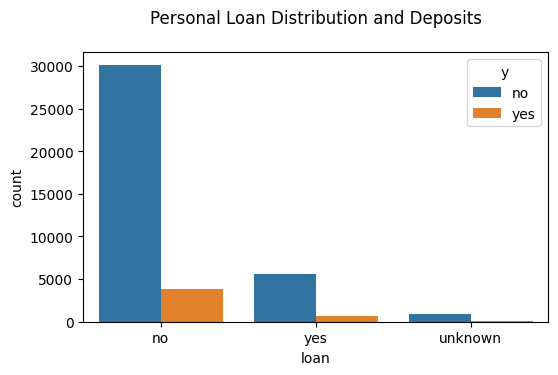

In [14]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits dont have personal loan

#### Distribution of Outcome (Term Deposits)

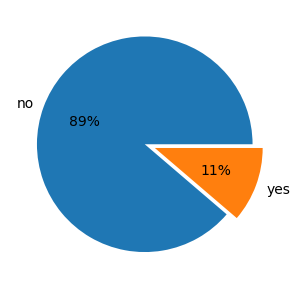

In [15]:
#Count of Outcome
df.y.value_counts()
keys = df.y.value_counts().index
data = df.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to Term Deposit

### Label Encoding Categorical Features

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [17]:
le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Correlation Analysis using Heatmap

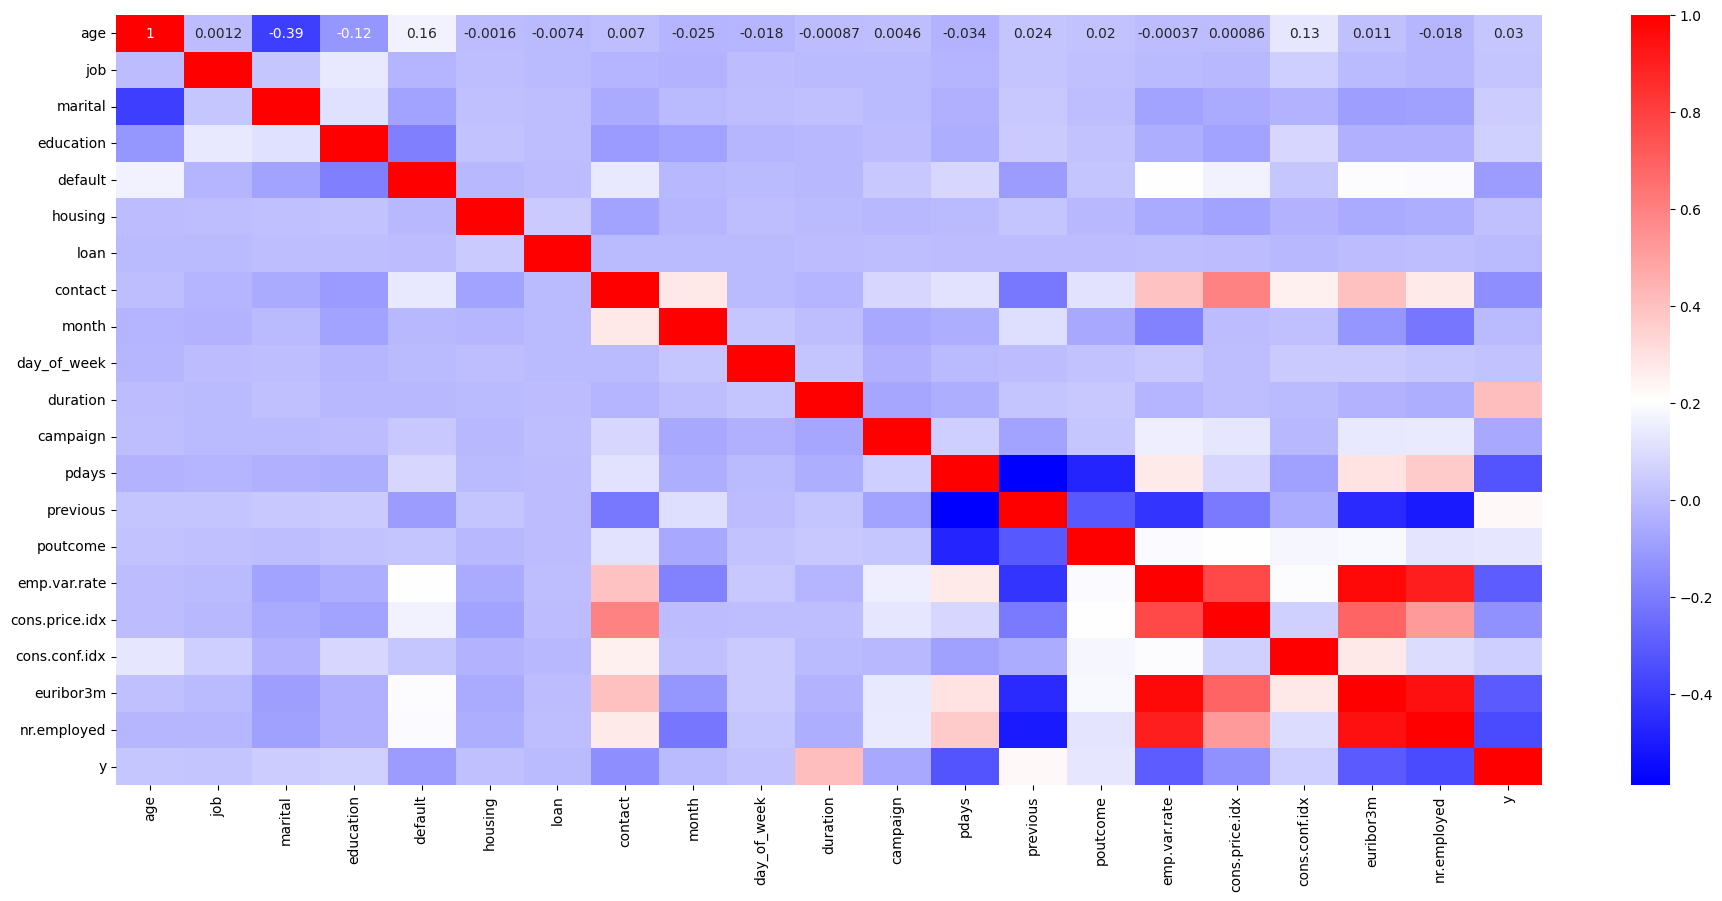

In [19]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()

### Standardisation

In [20]:
#Splitting input and output
X = df.drop("y", axis=1)
y = df.y

In [21]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [22]:
X_scaled

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.292025,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.481012,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.267225,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.708569,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


### Balancing data

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= 1)
x_res,y_res = ros.fit_resample(X_scaled,y)

### Building training and test samples

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.30)

### Model Selection

### 1) Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes model accuracy (in %):", acc*100)

Number of mislabeled points out of a total 21929 points : 4786
Naive Bayes model accuracy (in %): 78.17501938072871


### 2) LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 86.38788818459574


In [27]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("SVM model accuracy (in %):", acc*100)

SVM model accuracy (in %): 89.22887500570022


### 4) Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
from sklearn.metrics import accuracy_score,classification_report,f1_score
dt=DecisionTreeClassifier()#object creation for decision tree
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_train_predict=dt.predict(X_train)
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25679
           1       1.00      1.00      1.00     25488

    accuracy                           1.00     51167
   macro avg       1.00      1.00      1.00     51167
weighted avg       1.00      1.00      1.00     51167



In [30]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,10110,759
1,33,11027


In [31]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
print("Desicion Tree model accuracy (in %):", test_acc*100)

Desicion Tree model accuracy (in %): 96.38834420174199


### 5) Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  
y_hat=classifier.predict(X_test)
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,10187,682
1,23,11037


In [33]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
print("Random Forest model accuracy (in %):", test_acc*100)

Random Forest model accuracy (in %): 96.78507911897486


### 6) Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)
 
# Predict on test set
y_pred = gbc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc*100))

Gradient Boosting Classifier accuracy is : 89.38


### 7) ANN

In [36]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50,3),
                      learning_rate_init= 0.1,
                      max_iter = 100,
                      random_state = 2)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
pd.crosstab(y_test,y_pred_test)

col_0,0,1
y,,
0,9264,1605
1,708,10352


In [40]:
print('ANN test accuracy is (in%)',accuracy_score(y_test,y_pred_test)*100)

ANN test accuracy is (in%) 89.45232340736011


# Report

+ After all the research and study done by my team, our conclusion is the Random Forest algorithm is best for your dataset. The model is stored in a classifier object in which you need input data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome') to get an output

## After all the analysis done by my team our suggestion is that:

+ Target those applicant who are "Admin", "blue-collar" or "Technician"
+ And specially target those people who are single 
+ Target those client who has completed his/her graduation and higher studies